# SHAP - #3

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see papers for details and citations).

# STEPS Involved to Plugin COVID19-PNEUMONIA to SHAP
* Load the Pre-trained persisted model (model.h5)
* Plugin the pre-trained model in to SHAP for explanation
* Use Gradient Explainer for interpretation of last but layer in RNN
* Get the image to explain and visualize the results
* Note - We were first practising with Imagenet dataset

# Issues Faced

* Loaded Pre-Trained Model to SHAP -  Successful
* Printed SHAP Values - Successful
### * We encountered issues only with Image Plot and Summary Plot - Error "could not broadcast input array from shape (224,224,16) into shape (1,224,224)"
### * However, we were able to successfully load the pre-trained model to Shap and print Shap scores as you see in the above output

#### Clone SHAP Repo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
%cd /content/drive/My\ Drive/DL/

/content/drive/My Drive/DL


In [ ]:
!git clone https://github.com/slundberg/shap.git

Cloning into 'shap'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8075 (delta 1), reused 5 (delta 1), pack-reused 8067
Receiving objects: 100% (8075/8075), 176.50 MiB | 13.43 MiB/s, done.
Resolving deltas: 100% (5357/5357), done.
Checking out files: 100% (393/393), done.


In [ ]:
cd shap

/content/drive/My Drive/DL/shap


### Install shap

In [3]:
!pip install shap

     |████████████████████████████████| 327kB 7.2MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463912 sha256=102b4103ccf0227935bb748354a40d68218f6192e519f880c405277ac9d58c8b
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


## SHAP with VGG16 : IMAGE NET (Understanding / Practice)

553467904/553467096 [==============================] - 7s 0us/step
Shap_values [array([[[[ 4.46379818e-06, -4.12044164e-06, -8.60343278e-07, ...,
           2.32990851e-06,  5.09417487e-06,  1.01575779e-06],
         [ 5.37332835e-06, -2.10214853e-06,  9.52403951e-08, ...,
           3.57257113e-06,  1.12300540e-06,  5.10885457e-07],
         [ 4.31590888e-06,  1.29112652e-06,  3.16909700e-06, ...,
           3.11284816e-06,  7.66867061e-07,  1.61536047e-06],
         ...,
         [ 2.53843173e-05,  2.93790521e-07,  3.50882772e-07, ...,
          -8.06614935e-06,  6.94666596e-06, -9.12697260e-07],
         [ 2.48951146e-05,  8.81372898e-07, -5.08576136e-07, ...,
          -5.06415017e-06,  9.17918260e-06,  7.49750825e-07],
         [ 2.69810134e-05,  2.13039493e-06,  1.07782256e-07, ...,
          -2.79838218e-06,  1.45091608e-05,  5.07091727e-07]],

        [[-6.39727560e-08, -1.50881951e-05,  3.81992186e-06, ...,
           7.39762925e-07,  5.41873032e-06,  7.16396755e-08],
        

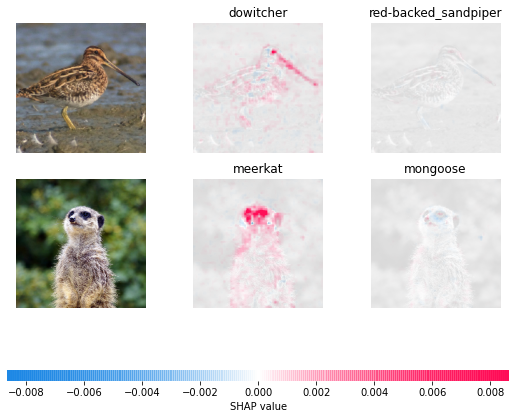

In [11]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import shap
import keras.backend as K
# import tensorflow.compat.v1.keras.backend as K
# import tensorflow as tf
# tf.compat.v1.disable_eager_execution()
import json

# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)
X,y = shap.datasets.imagenet50()
# print(X)
to_explain = X[[39,41]]
# print("to_explain:",to_explain)

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)
# print(class_names)

# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)

e = shap.GradientExplainer((model.layers[7].input, model.layers[-1].output), map2layer(preprocess_input(X.copy()), 7))
shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=2)

print("Shap_values",shap_values)
print("indexes",indexes)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)
print("index_names:###############",index_names)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

# SHAP for COVID - PNEUMONIA Model

*   Load the Pre-trained Model
*   Get the image to Explain
* Plugin the pre-trained model in to SHAP for explanation
* Use Gradient Explainer for interpretation of last but layer in RNN


In [2]:
pip install Pillow

In [3]:
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [3]:
# load and show an image with Pillow
import pandas as pd
from PIL import Image
import numpy
# Open the image form working directory

X = pd.read_csv("/content/drive/My Drive/DL/covid-cxr-master/data/processed/train_set.csv")
rawImage = Image.open("/content/drive/My Drive/DL/covid-cxr-master/data/"+X.iloc[0][1]);
size = 224,224
image = rawImage.resize(size,Image.ANTIALIAS).convert("RGB");
#image.show()
image.size
arr = numpy.array(image)
print(type(arr))
print(arr.shape)
# print(arr)
rawImage.show()
# image.show()

# from PIL import Image
# import numpy as np

# PIL_image = Image.fromarray(np.uint8(numpy_image)).convert('RGB')

# PIL_image = Image.fromarray(numpy_image.astype('uint8'), 'RGB')
#/content/drive/MyDrive/DL/covid-cxr-master/data/rsna/0004cfab-14fd-4e49-80ba-63a80b6bddd6.jpg

<class 'numpy.ndarray'>
(224, 224, 3)


### Get Image to Explain

In [ ]:
import pandas as pd
import numpy as np
import sklearn.datasets
import os

X = pd.read_csv("/content/drive/My Drive/DL/covid-cxr-master/data/processed/train_set.csv")


In [ ]:
X.head

<bound method NDFrame.head of       Unnamed: 0  ...     label_str
0            409  ...  non-COVID-19
1            150  ...  non-COVID-19
2            199  ...  non-COVID-19
3            349  ...  non-COVID-19
4             13  ...  non-COVID-19
...          ...  ...           ...
1484         334  ...  non-COVID-19
1485         149  ...  non-COVID-19
1486         421  ...  non-COVID-19
1487         311  ...  non-COVID-19
1488         672  ...  non-COVID-19

[1489 rows x 4 columns]>

In [ ]:
X.iloc[0][1] ## Get Image to Explain

'rsna/0759abcb-6e42-4837-956f-d4e8a4cd3537.jpg'

### Get Pre-trained Model to plugin to SHAP

In [4]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/My Drive/DL/covid-cxr-master/results/models/model20201121-152553.h5", compile=False)
model.summary()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv0_0 (Conv2D)                (None, 224, 224, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 16) 64          conv0_0[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReL

In [10]:
!pip install tensorflow==1.13.1
!pip install keras==2.3.0

     |████████████████████████████████| 92.5MB 116kB/s 
     |████████████████████████████████| 3.2MB 47.7MB/s 
     |████████████████████████████████| 368kB 53.6MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


     |████████████████████████████████| 378kB 9.0MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


## Load Model to SHAP and get Shap Values

In [5]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import shap
import keras.backend as K
import json


model = model # Load pre-trained Model  - COVID19 Model
X = arr.reshape(1,224,224,3) 
to_explain  = X

print(type(X))

# explain how the input to the 5th layer of the model (last but layer in RNN) explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)



e = shap.GradientExplainer((model.layers[5].input, model.layers[-1].output), map2layer(preprocess_input(X.copy()), 5))

print("Successfully Fed trained Model to SHAP............")
print("Gradient Explainer",e)

shap_values,indexes = e.shap_values(map2layer(to_explain, 5), ranked_outputs=2)

print("Shap_values",shap_values)
print("indexes",indexes)


# get the names for the classes
# index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)
# print("index_names",index_names)
#index_names = [['non-COVID-19' 'COVID-19']]
print("Shape summary",shap.summary_plot(shap_values[0],X)
# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

Using TensorFlow backend.


<class 'numpy.ndarray'>
Successfully Fed trained Model to Fed............
Gradient Explainer <shap.explainers._gradient.Gradient object at 0x7febbd67add8>
Shap_values [[array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         

TypeError: ignored

In [28]:
# shap.summary_plot(shap_values[0])
print(shap_values[0].shape)
print(X.shape)


(1, 112, 112, 128)
(1, 224, 224, 3)


# ISSUE FACED


*   Loaded Pre-Trained Model to SHAP Successfully
*   Printed SHAP Values - Refer above Output
## * We encountered issues only with Image Plot and Summary Plot - Error "could not broadcast input array from shape (224,224,16) into shape (1,224,224)"
### * However, we were able to successfully load the pre-trained model to Shap and print Shap scores as you see in the above output



In [6]:
shap.summary_plot(shap_values[0])

ValueError: ignored